<a href="https://colab.research.google.com/github/viviend1604/viviend1604/blob/main/Screentime_Jan_2025_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Screen Time Analysis - January 2025**
**1. Project overview**

This project analyses mobile app screentime data collected throghout January 2025. The goal is to uncover trends in user engagement, identify which apps are most used and explore how notifications and app opens relate to total screentime. The analysis supports better understanding of digital habits and potential opportunities for promoting healthier usage patterns.

**2. Dataset description**
* Date: The day the data was recorded
* App: The name of the app used
* Usage (minutes): Total screentime per app per day
* Notifications: Number of push notifications received
* Times opened: Number of times the app was opened that day

**3. Tools and libraries used**
* Python (Pandas, NumPy)
* Data visualisation: Matplotlib, Seaborn
* Notebook enviroment: Jupyter Notebook






# Data import and review
Loading the January 2025 screen time dataset and display the first few rows to understand the structure.

In [ ]:
#Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Screentime_Analysis/screentime_analysis_jan_2025.csv')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2025-01-01,Insta,120,11,38
1,2025-01-01,X,220,31,13
2,2025-01-01,WhatsA,126,65,89
3,2025-01-01,Telegram,60,5,14
4,2025-01-01,YouTube,120,2,10


# Data cleaning

The information from this dataset is going to be derived to be more accurated, consistent and reliable in this section. That includes:
* Standardize inconsistent app names
* Convert data type correctly
* Eliminate duplicates or incorrect values
* Prepare the dataset for meaningful visualisations.


In [ ]:
#Cover Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Check for missing values
df = df.dropna(subset= ['Date','App']) #drop rows where date or app name is missing
df['Usage (minutes)'] = pd.to_numeric(df['Usage (minutes)'], errors = 'coerce').fillna(0)
df['Notifications'] = pd.to_numeric(df['Notifications'], errors = 'coerce').fillna(0)
df['Times Opened'] = pd.to_numeric(df['Times Opened'], errors = 'coerce').fillna(0)


#Clean app names
df['App'] = df['App'].astype(str).str.strip().str.lower()

# App name corrections
app_corrections = {
    'instgram': 'instagram',
    'insta': 'instagram',
    'youtub' : 'youtube',
    'fb' : 'facebook',
    'whatsapp messenger' :'whatsapp',
    'whatsa' :'whatsapp',
    'ms teams' :'microsoft teams',
    'netfli' : 'metflix',
    'googl calender' : ' google calendar',
    'twiter' : 'twitter',
} # Add more if needed

df['App'] = df['App'].replace(app_corrections)

df.info()
print(df['App'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             240 non-null    datetime64[ns]
 1   App              240 non-null    object        
 2   Usage (minutes)  240 non-null    int64         
 3   Notifications    240 non-null    int64         
 4   Times Opened     240 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.5+ KB
['instagram' 'x' 'whatsapp' 'telegram' 'youtube' 'netflix' 'facebook'
 'linkedin' 'twitter']


This dataset contains **240 records** with **five columns** that provides daily mobile app usage patterns across eight different applications. Each row represents a specific app's usage on a given day.
Apps included: Instagram, X, WhatsApp, Telegram, Youtube, Netflix, Facebook, LinkedIn and Twitter. All fields are complete with no missing values and ready for the analysis

# Exploratory Data Analysis
Let's uncover patterns, trends and relationships within this dataset and to dive deeper into the insights. This sections consists:


*   Understand overall usage behavior
*   Indentify the most and least used apps
*   Compare app engagement styles
*   Detect outliers or unsual usage patterns
*   Explore correlations


In [ ]:
# Sorting by the actual column name tuple
app_summary = df.groupby('App')[['Usage (minutes)','Notifications','Times Opened']].agg(['sum','mean','max']).round(1)

# Sorting by total usage
app_summary = app_summary.sort_values(('Usage (minutes)', 'sum'), ascending = False)

# Flatten multi-level column names
app_summary.columns = ['_'.join(col).strip() for col in app_summary.columns.values]
app_summary.reset_index (inplace = True)

print(app_summary)


         App  Usage (minutes)_sum  Usage (minutes)_mean  Usage (minutes)_max  \
0   facebook                 5331                 177.7                  419   
1   whatsapp                 5226                 174.2                  323   
2  instagram                 5120                 170.7                  308   
3    youtube                 4849                 161.6                  312   
4   telegram                 4770                 159.0                  226   
5    netflix                 4548                 151.6                  290   
6   linkedin                 4368                 145.6                  222   
7          x                 3900                 150.0                  239   
8    twitter                  436                 109.0                  139   

   Notifications_sum  Notifications_mean  Notifications_max  Times Opened_sum  \
0               1114                37.1                 67               886   
1               3397               11

Key takeaways:


*   **Facebook** is the highest total usage time with cosistnely long sessions.
*   **WhatsApp** leads in notifications and opends but sessions are shorter which shows frequent and quick interactions.
*   **Youtube** and **Netflix** have very low notifications and fewer opens but high average usage that suggests log and passive use.
*   **Instagram** has both frequent usage and high notifications that places it between entertainment and distraction.
*   **Twitter** has the lowest number in usage, notifications and times opened which indicates the minimal engagement.

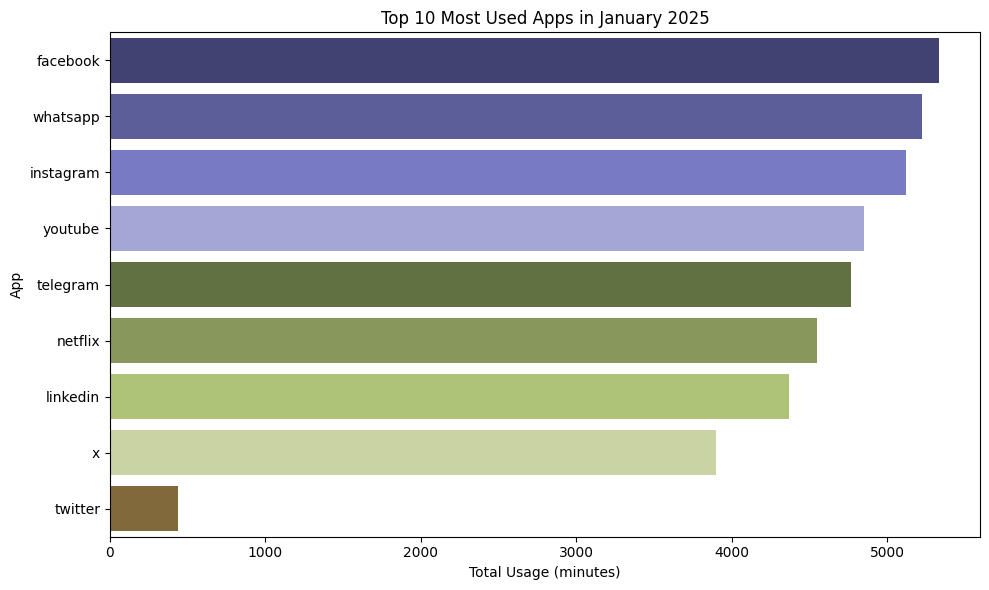

In [ ]:
#Top 10 most used apps (total time)
top_apps = df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False).head(10)
top_apps_df = top_apps.reset_index()
plt.figure(figsize = (10,6))
sns.barplot(
    x=top_apps_df['Usage (minutes)'],
    y=top_apps_df['App'],
    palette ='tab20b')
plt.title('Top 10 Most Used Apps in January 2025')
plt.xlabel('Total Usage (minutes)')
plt.ylabel('App')
plt.tight_layout()
plt.show()

Key takeaways:
*   **Facebook, Whatsapp** and **Instagram** are the top 3 apps that showing strong user preference for social platform
*   **Youtube** and **Netflix** rank high depsite fewer opens and notifications that indicates long, uninterrupted usage sessions.
*   **Telegram** and **LinkedIn** show moderate engagement, a combination of communication and  productivity.
*   **X** and **Twitter** appear in the top 10 but have significantlu lower usage which suggests limited user interaction.

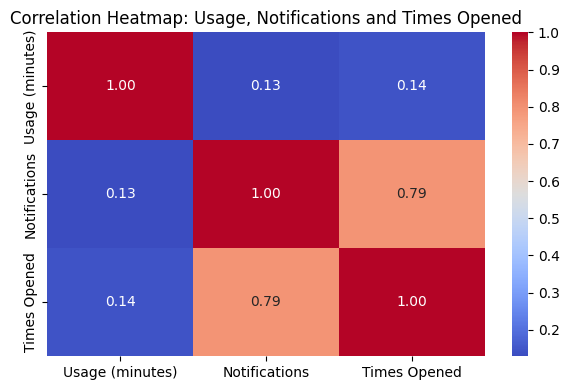

In [ ]:
#Correlation between Notifications and Usage
corr = df[['Usage (minutes)', 'Notifications', 'Times Opened']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt =".2f")
plt.title('Correlation Heatmap: Usage, Notifications and Times Opened')
plt.tight_layout()
plt.show()

Key takeaways:


1.   Strong correkation between Notifications and Times Opened:

*   **Correlation = 0.79**
  - This suggests that apps sending more notifications tend to be opened more frequently. As users are responding to notifications quickly or repeatedly.



2.   Weak correlation between Usage and Notifications / Times Opened:


*   **Usage vs Notifications = 0.13**
*   **Usage vs Times Opened = 0.14**
 - This indicated just receiving many notifications or opening the app often does not necessarily lead to long usage sessions
 - Some apps maybe opened shortly and closed again.


Hence, the heatmap of correlation of Usage, Notifications and Times Opened are strongly linked to how often an app is opened (correlation = 0.79) that push alerts drive frquent engagement. However, both notifications and times opened show weak correlation with total usage time ( around 0.13 - 0.14) meaning that frequent app opens do not necessarily result in longer screen time.




















## Overall
The analysis of the top 10 most used apps, summary statistics and correlation heatmap reveals distinct user engagement patterns. Social apps like **Facebook, WhatsApp** and **Instagram** lead total time screen, with **WhatsApp** standing out for its high number of notifications and app opens which shows frequent and short interactions. On the other hand, **Youtube** and **Netflix** maintain high usage despite minimal notifications, suggesting longer and moew passive sessions. The correlation heatmap demonstrates that notifications are strongly associated with how often an app is opened but only weakly related to total usage screen time. This highlights two types of app engagement: those that rely on frequent alerts to drive activity and those that retain attention through entire usage without prompting.





## Distribution Analysis
The purpose if this analysis is to visually examine the spread, central tedency and presence of outliers in the three key screentime metrics: Usage (minutes), Notifications ans Times Opened.

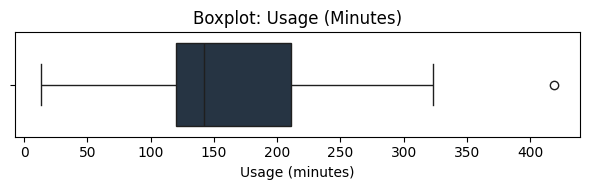

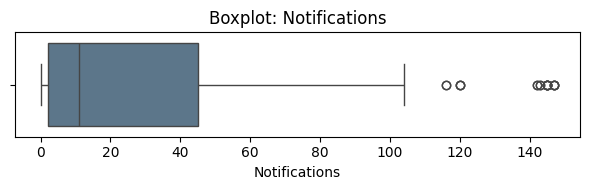

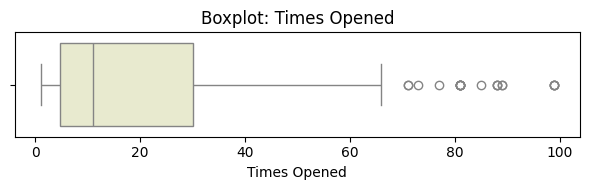

In [ ]:

# Colour selections
colors = ['#213448', '#547792', '#ECEFCA']

# Boxplot for Usage (minutes)
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Usage (minutes)'], color=colors[0])
plt.title('Boxplot: Usage (Minutes)')
plt.tight_layout()
plt.show()

# Boxplot for Notifications
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Notifications'], color=colors[1])
plt.title('Boxplot: Notifications')
plt.tight_layout()
plt.show()

# Boxplot for Times Opened
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Times Opened'], color=colors[2])
plt.title('Boxplot: Times Opened')
plt.tight_layout()
plt.show()


Key takeaways:
* **Usage (minutes)**: most users spend between 100 to 300 minutes per app per day; when a few outliers go beyond 400 minutes which indicates intense usage sessions for certain apps.
* **Notifications**: the majority of apps send fewer than 50 notifications a day. However, some apps generates over 140 that shows highly interruptive behavior.
* **Times Opened**: apps are mostly opened under 40 minutes per day. But there are some opened as much as 100 times which reflexes highly repetitive usage.

In the conclusion, the data shows right-skewed distributions with several outliers, espcially in notifications and app openings that lead to apps that heavily prompt user engagement or are check excessively

## Distribution of Key Metrics by App
Let's analyse the distribution of key metrics by app to understand ho user behavior varies across the top 10 most used apps. By visualising Usage (minutes), Notifications and Times Opened, this sector is able to:
* Compare user engagement styles across apps
* Identify outliers or extreme usage
* Reveal which apps are used frequently versus used intensively

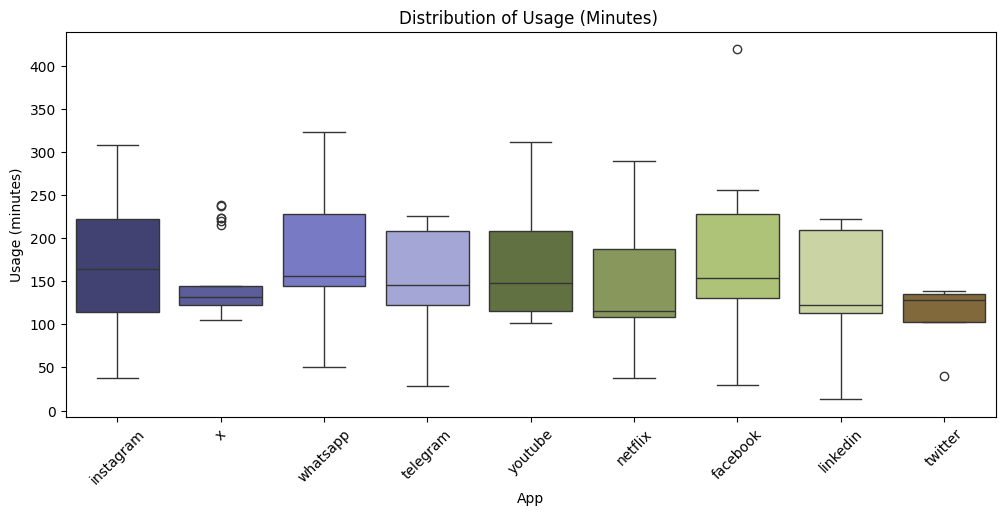

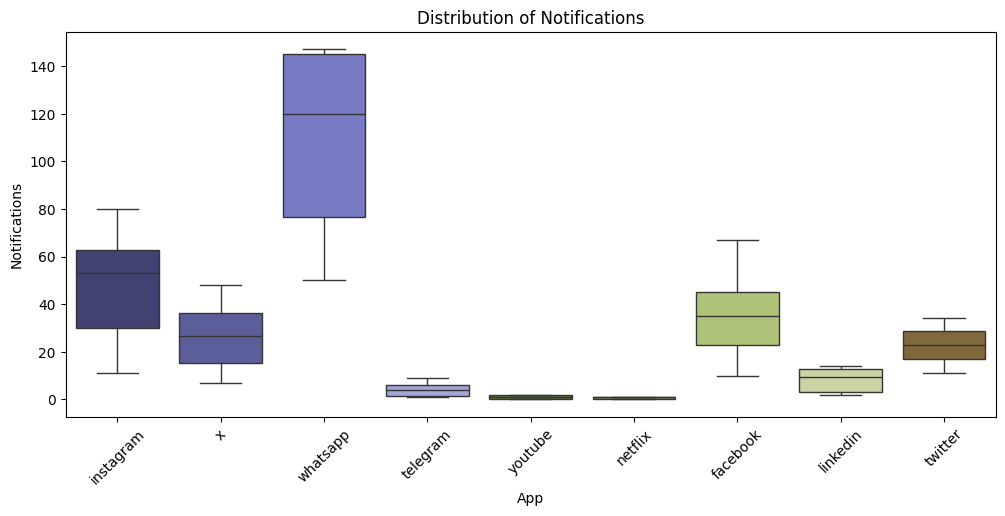

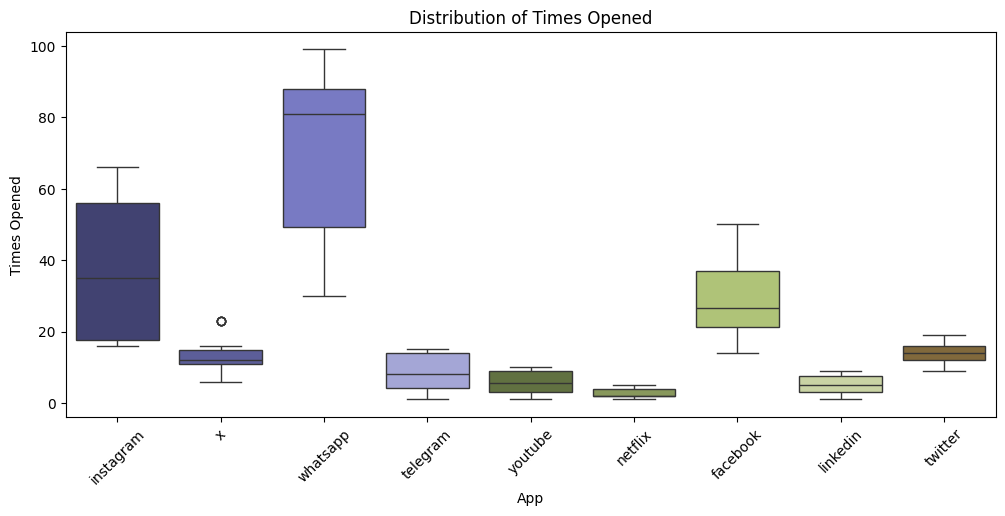

In [ ]:

#Top 10 apps
top_apps_list = df['App'].value_counts().head(10).index.tolist()
filtered_df = df[df['App'].isin(top_apps_list)] #Filter to top 10 apps to keep the plot readable

#Usage by App
plt.figure(figsize=(12, 5))
sns.boxplot(data=filtered_df, x='App', y='Usage (minutes)', palette='tab20b')
plt.title('Distribution of Usage (Minutes) ')
plt.xticks(rotation=45)
plt.show()

#Notifications by App
plt.figure(figsize=(12, 5))
sns.boxplot(data=filtered_df, x='App', y='Notifications', palette='tab20b')
plt.title('Distribution of Notifications')
plt.xticks(rotation=45)
plt.show()

#Times Opened by App
plt.figure(figsize=(12, 5))
sns.boxplot(data=filtered_df, x='App', y='Times Opened', palette='tab20b')
plt.title('Distribution of Times Opened')
plt.xticks(rotation=45)
plt.show()


Key takeaway:
* **WhatsApp** shows high medians and extreme values for both notifications and times opened that demonstrates the frequent and alert-driven use.
* **Youtube** and **Netflix** have lower notification counts but wide spreads in usage minutes that shows longer and passive sessions.
* **Instagram** and **Facebook** show balanced distributions across all three metrics, reflecting both frequent interactions and extended use.
* Other apps have lower median values but wide outlier ranges that points to occational high-use days.

Hence, this analysis highlights distinct app usage patterns that some apps drive constant attention through alerts. Meanwhile, others have users through prolonged engagament.

## Temporal trends
The temporal trends is used to uncover patterns in app usage, notifications and engagement across different days helping identify peaks, habits and anomalies

The purpose of analysing **screentime per day** is to understand daily usage patterns and identify:
* When users are most engaged
* Fluctuations in behavior (increase or decrease in usage)
* Trends over time that may relate to weekdays, weekends, holidays or specific occasions
* Opportunities to invest underlying causes of spikes

This step is carried out to have a clearer picture of user habits and supports strategic decisions around engagement, scheduling of future promotion.

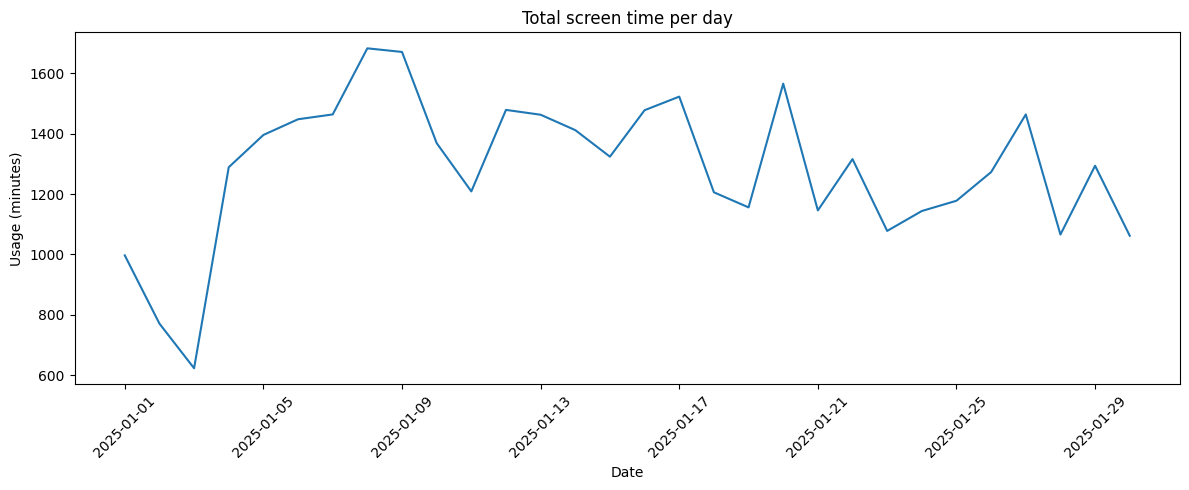

In [ ]:
# Total usage per day
daily_usage = df.groupby('Date')['Usage (minutes)'].sum().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_usage, x='Date', y='Usage (minutes)')
plt.title('Total screen time per day')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Key takeaways:
* Daily screentime fluctuates significantly throughout January 2025 from 650 to 1700 minutes per day.
* The highest usage spike occured around 8th to 9th January due to weekends or high-enegagement events.
* There is a significant drop in screentime on 2nd to 3rd and around 18th of January as occasional dips in digital activity.
* Despite fluctuations, the overall pattern shows consistent in high use with multiple peaks indicating repeated cycles of elevated engagement.

Therefore, this trend highlights user behavior that varies daily, possibly influenced by external factors like weekends, workdays or any app campaigns. Further analysis by day of week could help explain preaks and drops.

**The analysis in day of the week** is to see the average screen time by day of the week in order to uncover behavioral patterns ties to specific days of the week. This helps indentify whether users tend to spend more time on their devices during weekdays or weekends and if any particular days stand out with consistently high or low usage.

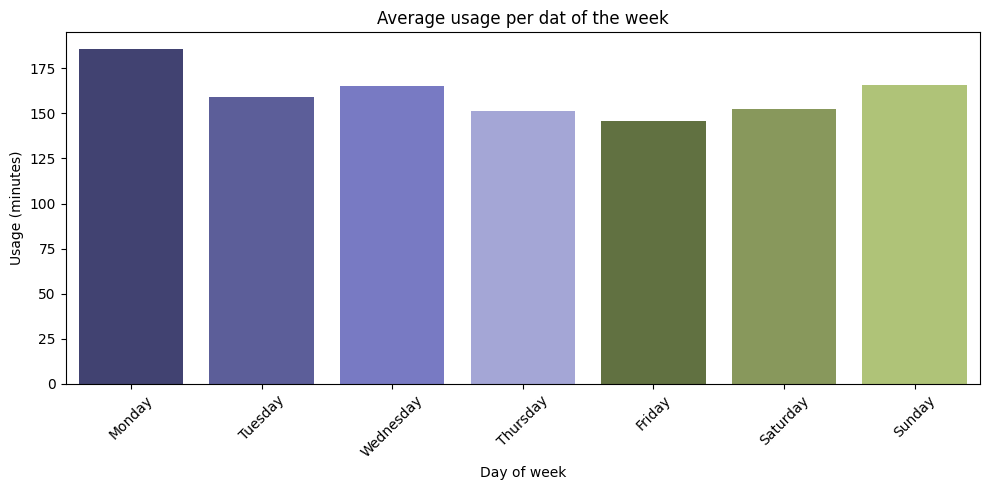

In [ ]:
# Average usage per day of the week
df['Day of week'] = df['Date'].dt.day_name()

# Calculate avergae usage per weekday
weekday_usage =
df.groupby ('Day of week')['Usage (minutes)'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

# Plot
plt.figure(figsize = (10,5))
sns.barplot( data =weekday_usage, x = 'Day of week', y = 'Usage (minutes)', palette = 'tab20b')
plt.title('Average usage per dat of the week')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Key takeaways:
* Monday shows the highest average screentime that indicates the strong start of week engagement
* Friday has the lowest number in usage that shows a potential shift from screentime heading into weekend.
* Weekend usage (Saturday and Sunday) is moderate but Sunday has a slight increase. It is possibly reflecting more leisure oriented pattern in using.

Thus, usage stay consistent across all day of the week ith only slight variations that demonstrates steady daily appl engagement throughout the week. This trend may reflect routine habits where users checkin more frequently at the start of the week and slowly reducing toward the weekend.

The main reason to go deep into **top three apps usage over time** is to:
* Understand user engagement patterns across the most frequently used platforms
* Observe the movement in usage activities in order to identigy peaks, habits or sudden changes in behavior.
* Compare how each app contributes to overall screentime and how this shifts day by day
* Detect dominant apps during high-usage periods and assess whether their engagement is steady or event-driven

Therefore, this section helps in identifying which apps drive the most attention and how usage varies overtime, enabling better insight into user preferences and digital habits.

<Figure size 1200x600 with 0 Axes>

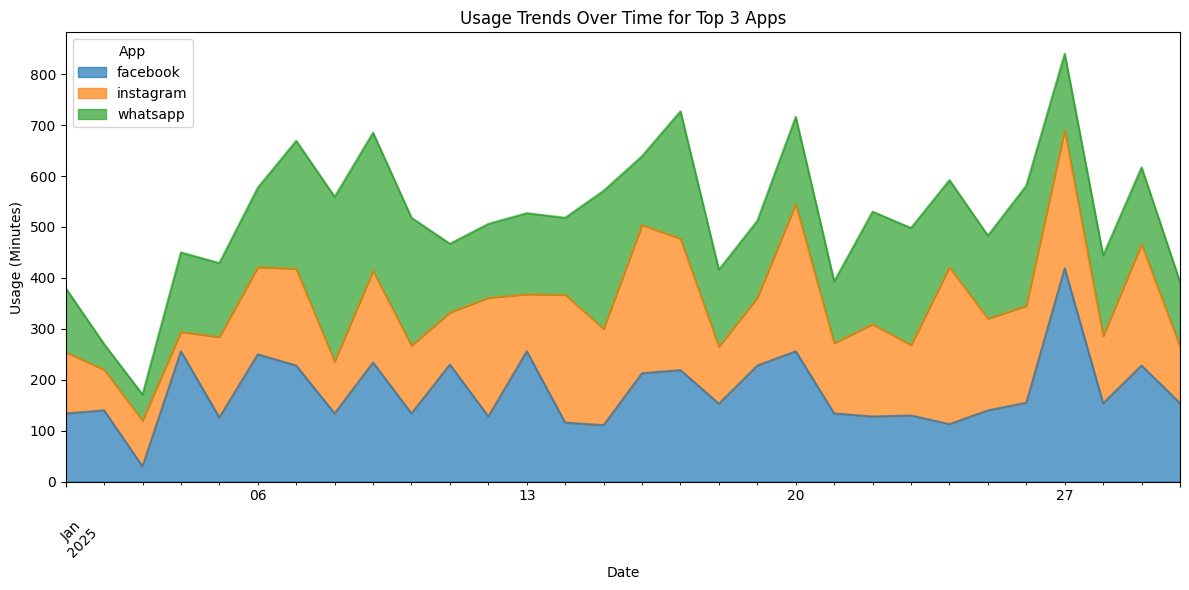

In [ ]:
# Top 3 apps by total usage
top_3_apps = df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False).head(3).index.tolist()

# Filter data for only those apps
top3_df = df[df['App'].isin(top_3_apps)]

# Group by Date and App
area_data = top3_df.groupby(['Date', 'App'])['Usage (minutes)'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
area_data.plot.area(stacked=True, figsize=(12, 6), alpha=0.7)
plt.title('Usage Trends Over Time for Top 3 Apps')
plt.ylabel('Usage (Minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key takeaways:
* **WhatsApp** consistently dominates daily usage, often contributing the largest portion of sceeentime, especially in the middle and end of the month.
* **Facebook** remain relatively stable but peaks around the end of January, possibly introducing a sopike in social engagement.
* **Instagram** shows fluctuations with several mid-month spikes suggesting event-driven or bursty engagement.
* All three apps combines a show a high overall screen time with some noticeable daily peaks exceeding 800 minutes

This analysis helps indetify usage behavior across top apps revealing which platforms are most engaging and how user focus shifts throughout the month.

# Overall

## Summary and Insights
* Top 3 most used apps:
  * Facebook, WhatsApp and Instagram have the highest total screentime.
  * WhatsApp lead in notifications and open frequency while Facebook and Instagram showed stable daily engagement.
* Daily usage trends:
  * Screentime peaks around 8th-9th January and shows consistent usage throughout the month with minor drops in mid-month.
  * Monday has the highest average screentime that suggests strong early-week engagement.
* Behavior patterns:
  * WhatsApp reflects frequent but short interactions (high in times opened and notifications).
  * Youtube and Netflix demonstrate long and passive use with fewer opens and notifications.
  * Instagram and other apps have more variable usage that leads to event-driven behavior.
* Correlation findings:
  * Notifications and times opened had a strong correlations (0.79) that shows the push alerts are effective in driving quick re-enegaging.
  * Usage time has weak correlation with both notifications and opens that highlights the high screentime often comes from fewer but longer sessions.

## Recommendations
* Reduce notifications: by limiting non-essential notifications
* Promote digital well-being by using low-tech hours like on Friday. Furthermore, setting boundaries for notification heavy apps (such as Facebook and Instagram) is encouraged.
* Apply focus mode features to pause non-essential alters during work hours and night
* Optimise notifications not volumn by turning on notifications for meaningful interaction apps only and reduce low-impact alerts.

## Conclusion

The January 2025 screentime analysis reveals distinct trends in user activity across days, apps and engagement kinds. The majority of screeentime is spent on social media like Facebook, Instagram and Whatsapp. WhatsApp stands out due to its high amount of alerts and app launches which suggests frequent and briefr interactions. Netflix and Youtube, on the other hand, display extended periods of use with little notifications, indicating passive and concentrated use.

Consistently high screen usage is observed in daily trends with early and mid-month peaks. Average usage is highest on Mondays and lowest on Fridays which suggests that availability and attention may vary during the week.

Although there is a moderate link with overall usage duration, the correlation study indicated a strong connection between notifications and times opened that shows brief vist rather than sustained engagement. These ressults underline the necessity of striking a balance between notification tactics and user experience as well as chances to encourage more deliberate, healthful screen behaviors.